### LIBRARIES

In [1]:
import os
import glob
import time
import swifter
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import multiprocessing as mp
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode,iplot
from toggle_cell import toggle_code as hide
init_notebook_mode(connected=True)
hide()

### LOAD DATA

In [2]:
hide()
combined_csv = r"C:\Users\LOCALGHOST\Desktop\DATASETS\AIR_QUALITY\WAQI\Processed\combined_csv.csv" #add your path here
combined_df = pd.read_csv(combined_csv, parse_dates = True,index_col = 'date')

# pollutant_csv = r"C:\Users\LOCALGHOST\Desktop\DATASETS\AIR_QUALITY\WAQI\Processed\pollutant_csv.csv" #add your path here
# pollutant_df= pd.read_csv(pollutant_csv, parse_dates = True,index_col = 'date')


####  POLLUTANT -INDIVIDUAL TABLES
co_df   = combined_df[combined_df.gauge=='co']
no2_df  = combined_df[combined_df.gauge=='no2']
o3_df   = combined_df[combined_df.gauge=='o3']
pm25_df = combined_df[combined_df.gauge=='pm25']
so2_df  = combined_df[combined_df.gauge=='so2']
pm10_df = combined_df[combined_df.gauge=='pm10']


#### AVAILABILITY OF DATA

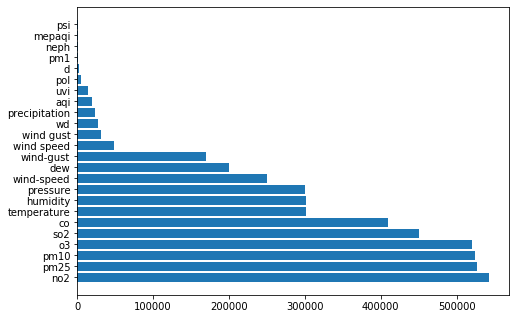

In [3]:
hide()
all_in_df_perc = combined_df['median'].groupby(combined_df['gauge']).count()
all_in_df_perc = all_in_df_perc.reset_index()
all_in_df_perc.rename(columns ={'median':'count'}, inplace = True)
all_in_df_perc.sort_values('count',ascending =False,inplace = True)
all_measurements = list(all_in_df_perc.gauge.unique())
############################################################################
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(all_in_df_perc['gauge'],all_in_df_perc['count'])
plt.show()

#### PERCENTAGE OF POLLUTANT DATA

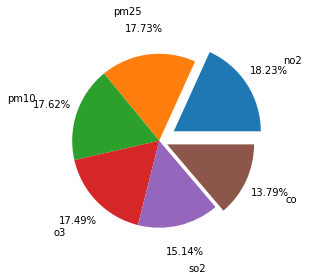

In [4]:
hide()
pollutant_list = ['co', 'no2', 'so2', 'pm10', 'pm25', 'o3']
pollutant_df = all_in_df_perc[all_in_df_perc['gauge'].isin(pollutant_list)][['gauge','count']]
###################################################################################################
explode = (0.2, 0, 0, 0, 0, 0.1)
plt.pie(pollutant_df['count'], labels=pollutant_df['gauge'], autopct='%1.2f%%', pctdistance=1.3, 
        labeldistance=1.5, explode = explode )
plt.show()


#### PERCENTAGE OF DATA PER COUNTRY 

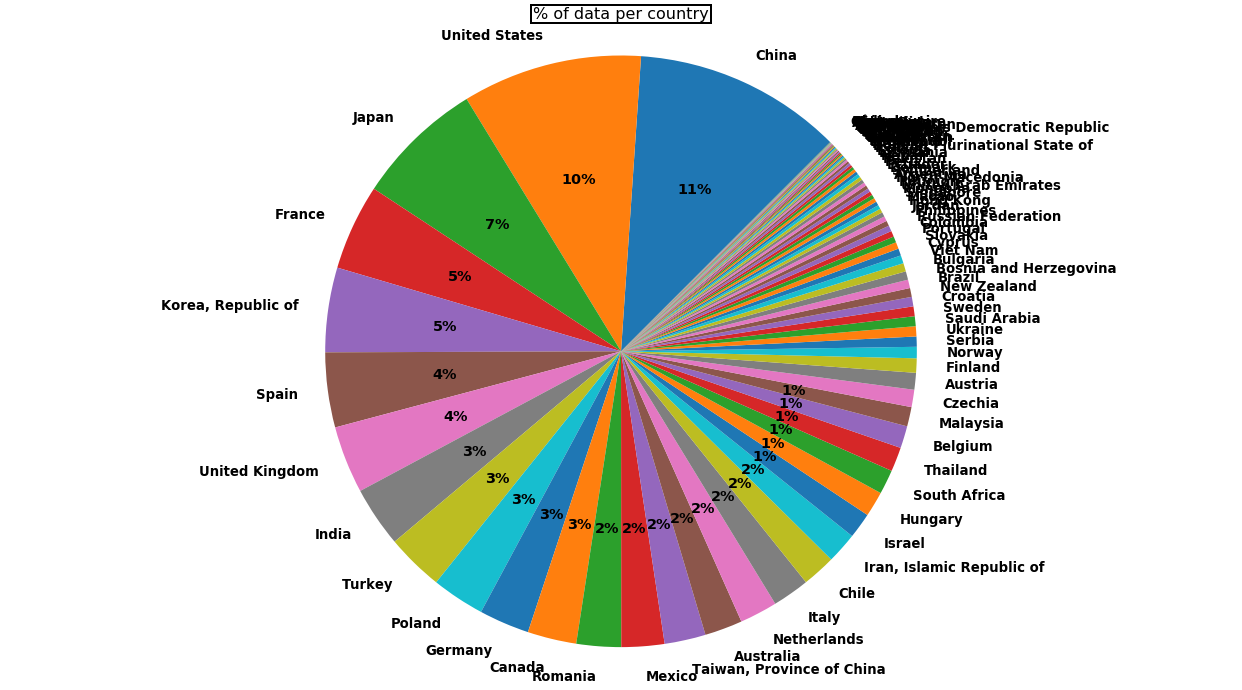

In [5]:
hide()
pdpc = combined_df['median'].groupby(combined_df['country']).count()
pdpc = pdpc.reset_index()
pdpc.rename(columns ={'median':'count'}, inplace = True)
pdpc = pdpc.sort_values('count', ascending = False)
pdpc.reset_index(drop=True, inplace = True)
######################################################################
sns.set_context("poster", font_scale=0.6)
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(22, 12))
labels = [s[0] if s[1] > 1 else ' ' 
          for index, s in  pdpc[['country', 'count']].iterrows()]
sizes  = pdpc['count'].values
explode = [0.0 if sizes[i] < 1000 else 0.0 for i in range(len(pdpc))]
ax.pie(sizes, explode = explode, labels = labels,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=45)
ax.axis('equal')
ax.set_title('% of data per country',
             bbox={'facecolor':'w', 'pad':2},color='k', fontsize=16);


Most of the data is from :
    - China
    - US
    - Japan
    - Korea
    - Spain
    - India
    - Turkey
    - Poland

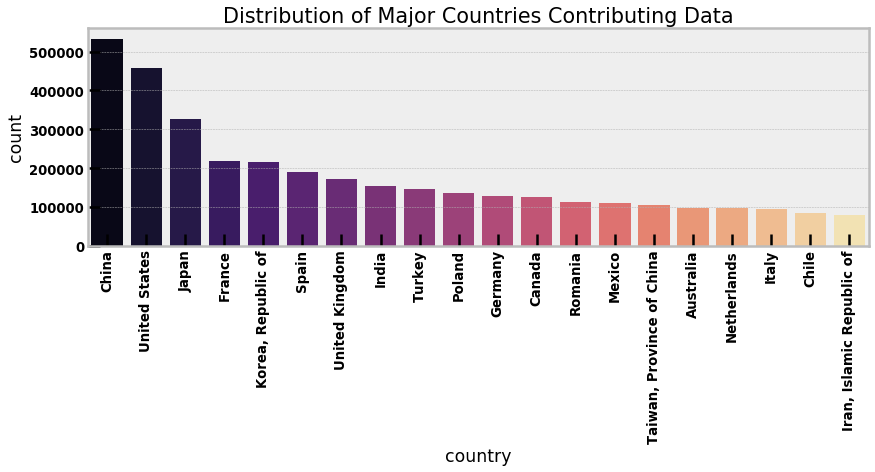

In [6]:
hide()
pdpc = pdpc[:20]
plt.style.use('bmh')
plt.figure(figsize=(14,4))
sns.barplot(pdpc['country'], pdpc['count'], palette='magma')
plt.xticks(rotation=90)
plt.title('Distribution of Major Countries Contributing Data');

In [7]:
imp_cntrs = list(pdpc.country)

In [8]:
co_df[0:5]

,c_code,city,gauge,count,min,max,median,variance,country
date,,,,,,,,,
2015-01-01,EC,Quito,co,138,2.3,48.9,5.6,647.09,Ecuador
2015-01-01,CA,Vancouver,co,44,0.1,0.1,0.1,0.00,Canada
2015-01-01,TR,Ankara,co,44,3.0,18.6,9.8,145.37,Turkey
2015-01-01,DE,Wiesbaden,co,22,0.1,0.1,0.1,0.00,Germany
2015-01-01,HU,Miskolc,co,68,5.5,24.9,10.9,139.37,Hungary


*** 


# DATA INFO


*** 

### CARBON MONOXIDE

In [9]:
co_df.describe()

,count,min,max,median,variance
count,410187.00000,410187.000000,410187.000000,410187.000000,4.101870e+05
mean,107.00129,2.393432,13.825920,5.039851,5.400854e+02
std,152.23885,6.268689,28.931276,10.646555,1.060026e+04
min,2.00000,0.000000,0.000000,0.000000,0.000000e+00
25%,24.00000,0.200000,3.200000,1.700000,2.270000e+00
50%,60.00000,1.500000,7.800000,3.600000,1.781000e+01
75%,129.00000,2.800000,15.400000,6.400000,6.940000e+01
max,2492.00000,500.000000,500.000000,500.000000,1.235540e+06


Average : median co-pollution globally is 5.039851 

*** 

### NITROGEN DIOXIDE

In [10]:
no2_df.describe()

,count,min,max,median,variance
count,542383.000000,542383.000000,542383.000000,542383.00000,542383.000000
mean,146.080062,3.508743,33.760468,11.36622,710.445058
std,209.593782,10.026486,25.477076,13.57057,2710.694582
min,2.000000,0.000000,0.000000,0.00000,0.000000
25%,48.000000,1.000000,18.600000,5.50000,139.880000
50%,92.000000,1.900000,29.400000,9.10000,365.850000
75%,174.000000,3.800000,42.600000,14.60000,794.870000
max,2766.000000,500.000000,714.000000,500.00000,506236.000000


*** 

*** 

### PM-25

In [11]:
pm25_df.describe()

,count,min,max,median,variance
count,527432.000000,527432.000000,527432.000000,527432.000000,5.274320e+05
mean,137.730164,26.931834,112.750043,59.436070,5.964400e+03
std,200.129797,32.112607,90.069601,44.314823,2.841083e+04
min,2.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,45.000000,5.000000,60.000000,28.000000,1.090620e+03
50%,79.000000,13.000000,89.000000,50.000000,2.337945e+03
75%,165.000000,38.000000,152.000000,75.000000,5.201290e+03
max,2759.000000,999.000000,999.000000,999.000000,3.188440e+06


*** 

*** 

### PM-10

In [12]:
pm10_df.describe()

,count,min,max,median,variance
count,524261.000000,524261.000000,524261.000000,524261.000000,5.242610e+05
mean,148.631643,12.837032,78.178783,29.539258,5.636188e+03
std,213.134514,19.334728,115.076562,29.365855,4.839384e+04
min,2.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,48.000000,3.000000,30.000000,13.000000,2.507600e+02
50%,93.000000,8.000000,52.000000,21.000000,7.205000e+02
75%,182.000000,16.000000,80.000000,39.000000,1.842520e+03
max,2779.000000,999.000000,1000.000000,999.000000,3.916120e+06


*** 

*** 

### SULPHUR DIOXIDE

In [13]:
so2_df.describe()

,count,min,max,median,variance
count,450555.000000,450555.000000,450555.000000,450555.000000,4.505550e+05
mean,97.127259,2.016770,16.913006,4.519403,3.949531e+02
std,130.204175,9.147625,27.608378,11.120867,5.755990e+03
min,2.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,24.000000,0.600000,2.900000,1.500000,2.890000e+00
50%,57.000000,1.300000,7.600000,2.900000,2.037000e+01
75%,119.000000,1.800000,19.300000,4.900000,1.150900e+02
max,2118.000000,500.000000,500.000000,500.000000,1.071840e+06


*** 

*** 

### OZONE

In [14]:
o3_df.describe()

,count,min,max,median,variance
count,520526.000000,520526.000000,520526.000000,520526.000000,5.205260e+05
mean,126.536188,7.202734,42.163460,21.636195,1.977517e+03
std,186.062312,15.362775,36.793954,19.807822,1.963998e+04
min,2.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,44.000000,0.900000,26.800000,12.800000,2.200600e+02
50%,72.000000,3.300000,35.700000,20.800000,5.620400e+02
75%,144.000000,10.200000,47.000000,28.100000,1.268207e+03
max,2724.000000,500.000000,1260.000000,500.000000,1.248500e+06


*** 

*** 

# GLOBAL AVERAGE - ALL COUNTRIES

### CARBON MONOXIDE

In [15]:
hide()
co_df_ctrs_avg = co_df.groupby(co_df['country']).mean()[['min','median','max']]
co_df_ctrs_avg.reset_index(inplace = True)
########################################################################################
fig = px.choropleth(co_df_ctrs_avg,locations = 'country',locationmode = "country names",
                    color = 'median', hover_name= 'country',
                    color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

### NITROGEN DIOXIDE

In [16]:
hide()
no2_df_ctrs_avg = no2_df.groupby(no2_df['country']).mean()[['min','median','max']]
no2_df_ctrs_avg.reset_index(inplace = True)
########################################################################################
fig = px.choropleth(no2_df_ctrs_avg,locations = 'country',locationmode = "country names",
                    color = 'median', hover_name= 'country',
                    color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

### PM-25

In [17]:
hide()
pm25_df_ctrs_avg = pm25_df.groupby(pm25_df['country']).mean()[['min','median','max']]
pm25_df_ctrs_avg.reset_index(inplace = True)
########################################################################################
fig = px.choropleth(pm25_df_ctrs_avg,locations = 'country',locationmode = "country names",
                    color = 'median', hover_name= 'country',
                    color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

### PM-10

In [18]:
hide()
pm10_df_ctrs_avg = pm10_df.groupby(pm10_df['country']).mean()[['min','median','max']]
pm10_df_ctrs_avg.reset_index(inplace = True)
########################################################################################
fig = px.choropleth(pm10_df_ctrs_avg,locations = 'country',locationmode = "country names",
                    color = 'median', hover_name= 'country',
                    color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

### SULPHUR DIOXIDE

In [19]:
hide()
so2_df_ctrs_avg = so2_df.groupby(so2_df['country']).mean()[['min','median','max']]
so2_df_ctrs_avg.reset_index(inplace = True)
########################################################################################
fig = px.choropleth(so2_df_ctrs_avg,locations = 'country',locationmode = "country names",
                    color = 'median', hover_name= 'country',
                    color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

### OZONE 

In [20]:
hide()
o3_df_ctrs_avg = o3_df.groupby(o3_df['country']).mean()[['min','median','max']]
o3_df_ctrs_avg.reset_index(inplace = True)
########################################################################################
fig = px.choropleth(o3_df_ctrs_avg,locations = 'country',locationmode = "country names",
                    color = 'median', hover_name= 'country',
                    color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

#  MEDIAN CHANGE OVER YEARS - ALL COUNTRIES

### CARBON MONOXIDE

In [21]:
hide()
co_df_ctrs_avg_yrly = co_df.groupby([co_df.country,co_df.index.year]).mean()[['min','max','median']]
co_df_ctrs_avg_yrly.reset_index(inplace = True)
####################################################################################################
fig = px.choropleth(co_df_ctrs_avg_yrly,locations = 'country',locationmode = "country names",
                    color = 'median',hover_name= 'country',hover_data={'median','max','min'},
                    animation_frame=co_df_ctrs_avg_yrly['date'],
                   color_continuous_scale=px.colors.sequential.Greys)
fig.update_layout(transition = {'duration' : 10})
fig.show()

### NITROGEN DIOXIDE

In [22]:
hide()
no2_df_ctrs_avg_yrly = no2_df.groupby([no2_df.country,no2_df.index.year]).mean()[['min','max','median']]
no2_df_ctrs_avg_yrly.reset_index(inplace = True)
####################################################################################################
fig = px.choropleth(no2_df_ctrs_avg_yrly,locations = 'country',locationmode = "country names",
                    color = 'median',hover_name= 'country',hover_data={'median','max','min'},
                    animation_frame=sorted(no2_df_ctrs_avg_yrly['date']),
                   color_continuous_scale=px.colors.sequential.Greys)
fig.update_layout(transition = {'duration' : 10})
fig.show()

### PM-25

In [23]:
hide()
pm25_df_ctrs_avg_yrly = pm25_df.groupby([pm25_df.country,pm25_df.index.year]).mean()[['min','max','median']]
pm25_df_ctrs_avg_yrly.reset_index(inplace = True)
####################################################################################################
fig = px.choropleth(pm25_df_ctrs_avg_yrly,locations = 'country',locationmode = "country names",
                    color = 'median',hover_name= 'country',hover_data={'median','max','min'},
                    animation_frame=sorted(pm25_df_ctrs_avg_yrly['date']),
                   color_continuous_scale=px.colors.sequential.Greys)
fig.update_layout(transition = {'duration' : 10})
fig.show()

### PM-10

In [24]:
hide()
pm10_df_ctrs_avg_yrly = pm10_df.groupby([pm10_df.country,pm10_df.index.year]).mean()[['min','max','median']]
pm10_df_ctrs_avg_yrly.reset_index(inplace = True)
####################################################################################################
fig = px.choropleth(pm10_df_ctrs_avg_yrly,locations = 'country',locationmode = "country names",
                    color = 'median',hover_name= 'country',hover_data={'median','max','min'},
                    animation_frame=sorted(pm10_df_ctrs_avg_yrly['date']),
                   color_continuous_scale=px.colors.sequential.Greys)
fig.update_layout(transition = {'duration' : 10})
fig.show()

### SULPHUR DIOXIDE

In [25]:
hide()
so2_df_ctrs_avg_yrly = so2_df.groupby([so2_df.country,so2_df.index.year]).mean()[['min','max','median']]
so2_df_ctrs_avg_yrly.reset_index(inplace = True)
####################################################################################################
fig = px.choropleth(so2_df_ctrs_avg_yrly,locations = 'country',locationmode = "country names",
                    color = 'median',hover_name= 'country',hover_data={'median','max','min'},
                    animation_frame=sorted(so2_df_ctrs_avg_yrly['date']),
                   color_continuous_scale=px.colors.sequential.Greys)
fig.update_layout(transition = {'duration' : 10})
fig.show()

### OZONE

In [26]:
hide()
o3_df_ctrs_avg_yrly = o3_df.groupby([o3_df.country,o3_df.index.year]).mean()[['min','max','median']]
o3_df_ctrs_avg_yrly.reset_index(inplace = True)
####################################################################################################
fig = px.choropleth(o3_df_ctrs_avg_yrly,locations = 'country',locationmode = "country names",
                    color = 'median',hover_name= 'country',hover_data={'median','max','min'},
                    animation_frame=sorted(o3_df_ctrs_avg_yrly['date']),
                   color_continuous_scale=px.colors.sequential.Greys)
fig.update_layout(transition = {'duration' : 10})
fig.show()

*** 

In [27]:
plt.rcParams['figure.figsize'] = (15,10)

#### Top  Polluted  Countries - CO-Average 

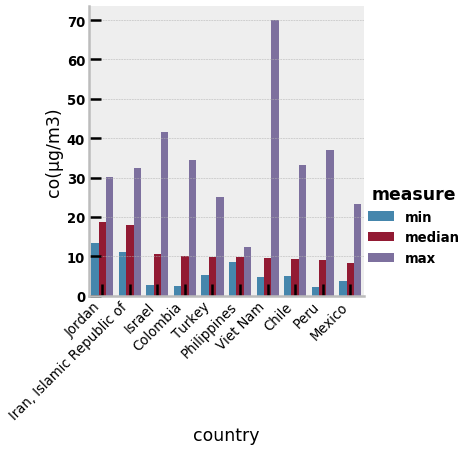

In [28]:
hide()
t = co_df_ctrs_avg.sort_values(by = 'median',ascending =False)[:10]
t = pd.melt(t, id_vars="country", var_name="measure", value_name="co(µg/m3)")
#############################################################################
chart = sns.catplot(
                     data=t,
                     x='country',
                     y='co(µg/m3)',
                     hue='measure',
                     kind='bar'
                     )
chart.set_xticklabels(rotation=45, horizontalalignment='right',fontweight='light')

#### Least  Polluted Countries - CO-Average 

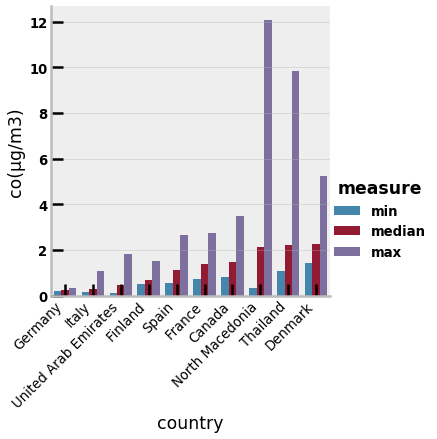

In [29]:
hide()
t = co_df_ctrs_avg.sort_values(by = 'median',ascending =True)[10:20]
t = pd.melt(t, id_vars="country", var_name="measure", value_name="co(µg/m3)")
#############################################################################
chart = sns.catplot(
                     data=t,
                     x='country',
                     y='co(µg/m3)',
                     hue='measure',
                     kind='bar'
                     )
chart.set_xticklabels(rotation=45, horizontalalignment='right',fontweight='light')
plt.show()

#### TOP POLLUTING COUNTRIES FROM MAJOR COUNTRIBUTERS

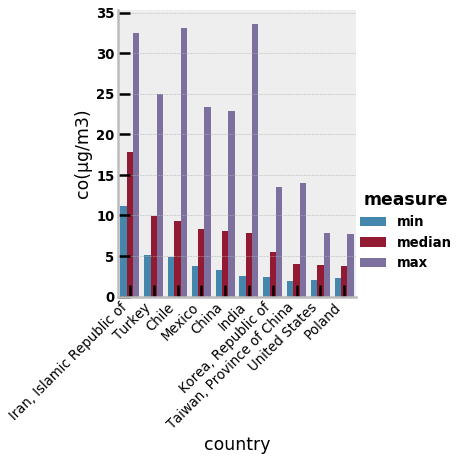

In [30]:
hide()
co_df_ic = co_df[co_df['country'].isin(imp_cntrs)]
co_df_ic = co_df_ic.groupby(co_df_ic['country']).mean()[['min','median','max']]
co_df_ic.reset_index(inplace = True)
t = co_df_ic.sort_values(by = 'median',ascending =False)[:10]
t = pd.melt(t, id_vars="country", var_name="measure", value_name="co(µg/m3)")
#############################################################################
chart = sns.catplot(
                     data=t,
                     x='country',
                     y='co(µg/m3)',
                     hue='measure',
                     kind='bar'
                     )
chart.set_xticklabels(rotation=45, horizontalalignment='right',fontweight='light')
plt.show()

**** 

#### LEAST POLLUTING COUNTRIES FROM MAJOR COUNTRIBUTERS

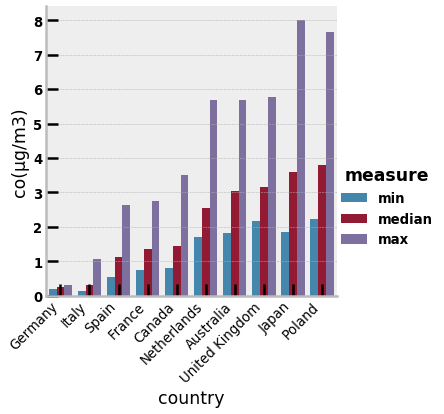

In [31]:
hide()
t = co_df_ic.sort_values(by = 'median',ascending =True)[:10]
t = pd.melt(t, id_vars="country", var_name="measure", value_name="co(µg/m3)")
#############################################################################
chart = sns.catplot(
                     data=t,
                     x='country',
                     y='co(µg/m3)',
                     hue='measure',
                     kind='bar'
                     )
chart.set_xticklabels(rotation=45, horizontalalignment='right',fontweight='light')
plt.show()